In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [42]:
path = '/Users/jonathanduberman/maverick_price_tool/data/2023-05-12T134737-carsdotcom_for_sale.csv'
odf = pd.read_csv(path)

In [43]:
df = odf.copy()

In [44]:
acceptable_trim_levels = ['XL','XLT','LARIAT']

In [45]:
mavericks = df.drop('Unnamed: 0', axis=1)

In [46]:
mavericks

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
0,USED,2023,FORD,MAVERICK,XLT,38988.0,Hot Pepper Red Tinted Clearcoat,Navy Pier,Front-wheel Drive,Hybrid,20.0,"4328 Louisburg Rd Raleigh, NC 27604",2023-05-12
1,USED,2023,FORD,MAVERICK,LARIAT,40873.0,Oxford White,Desert,All-wheel Drive,Gasoline,42.0,"4900 Capital Blvd Raleigh, NC 27616",2023-05-12
2,USED,2022,FORD,MAVERICK,XL,34091.0,Iconic Silver Metallic,Black Onyx,Front-wheel Drive,Hybrid,14911.0,"3940 Capital Hills Drive Raleigh, NC 27616",2023-05-12
3,USED,2022,FORD,MAVERICK,XLT,35497.0,Silver,Black Onyx,Front-wheel Drive,Gasoline,18425.0,"9820 Capital Blvd Wake Forest, NC 27587",2023-05-12
4,USED,2022,FORD,MAVERICK,XLT,36000.0,Area 51,Navy Pier,All-wheel Drive,Gasoline,2913.0,"11000 Capital Blvd Wake Forest, NC 27587",2023-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,USED,2022,FORD,MAVERICK,XL,32998.0,Gray,Black,All-wheel Drive,Gasoline,9719.0,"2783 Corby Ave Santa Rosa, CA 95407",2023-05-12
749,USED,2023,FORD,MAVERICK,XLT,39999.0,Carbonized Gray Metallic,Navy Pier,All-wheel Drive,Gasoline,0.0,"711 E Wishkah St Aberdeen, WA 98520",2023-05-12
750,USED,2023,FORD,MAVERICK,XLT,37999.0,Alto Blue Metallic Tinted Clearcoat,Navy Pier,Front-wheel Drive,Gasoline,45.0,"711 E Wishkah St Aberdeen, WA 98520",2023-05-12
751,USED,2022,FORD,MAVERICK,XL,36988.0,Oxford White,Black Onyx,All-wheel Drive,Gasoline,13296.0,"2701 E Mountain Village Dr Wasilla, AK 99654",2023-05-12


In [47]:
mavericks.list_price.describe()

count      717.000000
mean     36722.054393
std       4766.907061
min          0.000000
25%      34611.000000
50%      36604.000000
75%      38998.000000
max      52000.000000
Name: list_price, dtype: float64

In [48]:
mavericks.list_price

0      38988.0
1      40873.0
2      34091.0
3      35497.0
4      36000.0
        ...   
748    32998.0
749    39999.0
750    37999.0
751    36988.0
752    42987.0
Name: list_price, Length: 753, dtype: float64

In [49]:
mavericks.groupby(by='trim_level').count()['condition'].to_frame().rename(columns={'condition':'count'})

,count
trim_level,
6N,2
FOR,20
LARIAT,167
SPRINT,1
SUPERC,9
XL,183
XLT,371


In [50]:
mavericks[mavericks.list_price == 0]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
77,USED,2022,FORD,MAVERICK,LARIAT,0.0,Carbonized Grey Metallic,Desert Brown,Front-wheel Drive,Gasoline,7518.0,"700 N US Route 15 Dillsburg, PA 17019",2023-05-12
272,USED,2022,FORD,MAVERICK,XLT,0.0,Blue,Navy Pier/Medium Slate,All-wheel Drive,Gasoline,11649.0,"45 Washington St Foxboro, MA 02035",2023-05-12
414,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,23050.0,"308 N Outer Rd St James, MO 65559",2023-05-12
553,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,9857.0,"815 Nw 4th St Grand Rapids, MN 55744",2023-05-12


In [51]:
mavericks.mileage.describe()

count       751.000000
mean       9528.392810
std       12418.448861
min           0.000000
25%        1332.000000
50%        6339.000000
75%       13348.500000
max      169337.000000
Name: mileage, dtype: float64

In [52]:
mavericks[mavericks.mileage >= 100000]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
269,CERTIFIED,2022,FORD,MAVERICK,XLT,38900.0,ICONIC SILVER METALLIC,NAVY PIER -MED SLATE TRIM,–,–,169337.0,"3004 East Avenue, Rt 49 Central Square, NY 13036",2023-05-12
385,USED,2022,FORD,MAVERICK,XLT,27945.0,Blue,Gray,All-wheel Drive,Gasoline,113522.0,"25W175 Lake St Roselle, IL 60172",2023-05-12


In [53]:
mavericks[mavericks.list_price >= 40000]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
1,USED,2023,FORD,MAVERICK,LARIAT,40873.0,Oxford White,Desert,All-wheel Drive,Gasoline,42.0,"4900 Capital Blvd Raleigh, NC 27616",2023-05-12
28,USED,2022,FORD,MAVERICK,LARIAT,43700.0,Area 51,Desert,Front-wheel Drive,Hybrid,7683.0,"617 N Main St Belmont, NC 28012",2023-05-12
29,USED,2022,FORD,MAVERICK,XLT,41800.0,Velocity Blue Metallic,Navy Pier,Front-wheel Drive,Hybrid,14930.0,"617 N Main St Belmont, NC 28012",2023-05-12
46,USED,2023,FORD,MAVERICK,LARIAT,49997.0,White,Black Onyx,All-wheel Drive,Gasoline,135.0,"6510 Little River Tpke Alexandria, VA 22312",2023-05-12
47,USED,2023,FORD,MAVERICK,XLT,41000.0,Blue,Navy Pier,Front-wheel Drive,Gasoline,145.0,"6510 Little River Tpke Alexandria, VA 22312",2023-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,USED,2023,FORD,MAVERICK,LARIAT,40800.0,Shadow Black,Desert,All-wheel Drive,Gasoline,3065.0,"2100 N Broadway Walnut Creek, CA 94596",2023-05-12
743,USED,2022,FORD,MAVERICK,LARIAT,40987.0,Shadow Black,Desert,All-wheel Drive,Gasoline,4280.0,"3900 Portland Rd Newberg, OR 97132",2023-05-12
744,USED,2022,FORD,MAVERICK,SUPERC,43998.0,Iconic Silver,Navy Pier,Front-wheel Drive,Hybrid,10109.0,"2517 Biddle Road Medford, OR 97504",2023-05-12
747,USED,2022,FORD,MAVERICK,LARIAT,42990.0,Green,Desert,All-wheel Drive,Gasoline,12015.0,"846 Goodpasture Island Rd Eugene, OR 97401",2023-05-12


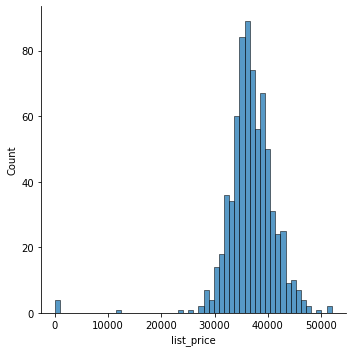

In [54]:
sb.displot(mavericks.list_price)

In [55]:
px.histogram(mavericks, x='list_price')

In [57]:
mavericks = mavericks[mavericks.trim_level.isin(acceptable_trim_levels)]

In [59]:
px.box(mavericks, x=mavericks.trim_level, y=mavericks.list_price)

In [60]:
mavericks.quantile(.25)

model_year     2022.0
list_price    34611.0
mileage        1294.5
Name: 0.25, dtype: float64

In [61]:
mavericks.sort_values(by='list_price')

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
553,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,9857.0,"815 Nw 4th St Grand Rapids, MN 55744",2023-05-12
414,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,23050.0,"308 N Outer Rd St James, MO 65559",2023-05-12
77,USED,2022,FORD,MAVERICK,LARIAT,0.0,Carbonized Grey Metallic,Desert Brown,Front-wheel Drive,Gasoline,7518.0,"700 N US Route 15 Dillsburg, PA 17019",2023-05-12
272,USED,2022,FORD,MAVERICK,XLT,0.0,Blue,Navy Pier/Medium Slate,All-wheel Drive,Gasoline,11649.0,"45 Washington St Foxboro, MA 02035",2023-05-12
335,USED,2022,FORD,MAVERICK,XL,11950.0,White,Gray,Front-wheel Drive,Gasoline,12729.0,"5700 NW 27th Ave Miami, FL 33142",2023-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,USED,2022,FORD,MAVERICK,XL,NaN,Cactus,Black Onyx,All-wheel Drive,Gasoline,13415.0,"501 NE Colbern Rd Lee's Summit, MO 64086",2023-05-12
522,USED,2023,FORD,MAVERICK,XL,NaN,–,–,FWD,Gasoline,7310.0,"13115 Southwest Freeway Sugar Land, TX 77478",2023-05-12
590,USED,2022,FORD,MAVERICK,LARIAT,NaN,–,–,Front-wheel Drive,Hybrid,1402.0,"1320 US-385 Andrews, TX 79714",2023-05-12
614,USED,2023,FORD,MAVERICK,XLT,NaN,Cactus Green / Gray,Black Onyx,All-wheel Drive,Gasoline,51.0,"2900 N 19th Ave Bozeman, MT 59718",2023-05-12


In [62]:
mavericks[mavericks.list_price.isna()]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
112,USED,2023,FORD,MAVERICK,XLT,NaN,Area 51,Blue,FWD,Hybrid,NaN,"3230 Satellite Blvd Duluth, GA 30096",2023-05-12
129,USED,2022,FORD,MAVERICK,XLT,NaN,NOT SPECIFIED,–,AWD,Gasoline,5845.0,"60 Railroad Ave Hasbrouck Heights, NJ 07604",2023-05-12
130,USED,2022,FORD,MAVERICK,XLT,NaN,NOT SPECIFIED,–,AWD,Gasoline,15319.0,"60 Railroad Ave Hasbrouck Heights, NJ 07604",2023-05-12
157,USED,2023,FORD,MAVERICK,XLT,NaN,Cyber Orange Metallic Tricoat,Navy Pier,All-wheel Drive,Gasoline,927.0,"1024 Route 22 Brewster, NY 10509",2023-05-12
193,USED,2022,FORD,MAVERICK,LARIAT,NaN,Area 51,Desert Brown,Front-wheel Drive,Gasoline,11057.0,"7040 E Colonial Dr Orlando, FL 32807",2023-05-12
203,USED,2022,FORD,MAVERICK,XLT,NaN,Blue,Navy Pier,All-wheel Drive,Gasoline,9066.0,"1202 Malabar Rd SE Palm Bay, FL 32907",2023-05-12
215,USED,2022,FORD,MAVERICK,LARIAT,NaN,Area 51,Desert,Front-wheel Drive,Hybrid,12375.0,"2600 Access Rd NW Davenport, FL 33897",2023-05-12
449,USED,2022,FORD,MAVERICK,XL,NaN,Cactus,Black Onyx,All-wheel Drive,Gasoline,13415.0,"501 NE Colbern Rd Lee's Summit, MO 64086",2023-05-12
522,USED,2023,FORD,MAVERICK,XL,NaN,–,–,FWD,Gasoline,7310.0,"13115 Southwest Freeway Sugar Land, TX 77478",2023-05-12
590,USED,2022,FORD,MAVERICK,LARIAT,NaN,–,–,Front-wheel Drive,Hybrid,1402.0,"1320 US-385 Andrews, TX 79714",2023-05-12


In [63]:
#this is an important line of code, do not delete it
mavericks = mavericks.dropna(subset='list_price') # drop na because we are about to do statistics on price

In [102]:
#important cell, do not delete
#calculate upper and lower quartile so you can get the interquartile range to eliminate outliers
q75,q25 = np.percentile(np.array(mavericks.list_price),[75,25])
intr_qr = q75 - q25
q75,q25,intr_qr


(38998.0, 34611.0, 4387.0)

In [68]:
#max = maximum value for standard outliers, min = min value for standard outliers
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
max,min

(45578.5, 28030.5)

In [69]:
#max_ex = max value for extreme outliers, min_ex = min value for extreme outliers
max_ex = q75+(3*intr_qr)
min_ex = q25-(3*intr_qr)
max_ex,min_ex

(52159.0, 21450.0)

In [71]:
mavericks[mavericks.list_price < min_ex]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
77,USED,2022,FORD,MAVERICK,LARIAT,0.0,Carbonized Grey Metallic,Desert Brown,Front-wheel Drive,Gasoline,7518.0,"700 N US Route 15 Dillsburg, PA 17019",2023-05-12
272,USED,2022,FORD,MAVERICK,XLT,0.0,Blue,Navy Pier/Medium Slate,All-wheel Drive,Gasoline,11649.0,"45 Washington St Foxboro, MA 02035",2023-05-12
335,USED,2022,FORD,MAVERICK,XL,11950.0,White,Gray,Front-wheel Drive,Gasoline,12729.0,"5700 NW 27th Ave Miami, FL 33142",2023-05-12
414,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,23050.0,"308 N Outer Rd St James, MO 65559",2023-05-12
553,USED,2022,FORD,MAVERICK,XLT,0.0,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,9857.0,"815 Nw 4th St Grand Rapids, MN 55744",2023-05-12


In [106]:
mavericks[mavericks.list_price > max_ex]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed


In [75]:
#this is an important cell of code, do not delete
#only removing low outliers for now because high outliers DNE, and slightly "extreme" outliers should be evaluated on a case by case basis in this market
mavericks_outliers_removed = mavericks.copy() #make copy to do stats work on
mavericks_outliers_removed.loc[:,'list_price'] = mavericks.list_price.mask(mavericks.list_price < min_ex, other=np.nan) # set extreme prices to nan 
#mavericks_outliers_removed.loc[:,'list_price'] = mavericks.list_price.mask(mavericks.list_price > max_ex, other=np.nan) # set extreme high prices to nan 


,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed


In [83]:
mavericks_outliers_removed.sort_values(by='trim_level', ascending=False)

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
0,USED,2023,FORD,MAVERICK,XLT,38988.0,Hot Pepper Red Tinted Clearcoat,Navy Pier,Front-wheel Drive,Hybrid,20.0,"4328 Louisburg Rd Raleigh, NC 27604",2023-05-12
420,CERTIFIED,2022,FORD,MAVERICK,XLT,35734.0,Velocity Blue Metallic,Navy Pier,All-wheel Drive,Gasoline,20076.0,"2303 W. Beltline Highway Madison, WI 53713",2023-05-12
379,USED,2022,FORD,MAVERICK,XLT,36995.0,Cactus Grey,Navy Pier/Medium Slate,All-wheel Drive,Gasoline,5565.0,"4173 Ogden Ave Aurora, IL 60504",2023-05-12
378,CERTIFIED,2022,FORD,MAVERICK,XLT,35999.0,Shadow Black,Navy Pier,All-wheel Drive,Gasoline,7154.0,"2055 Ogden Ave Naperville, IL 60540",2023-05-12
377,USED,2022,FORD,MAVERICK,XLT,37995.0,Area 51,Navy Pier,Front-wheel Drive,Gasoline,2160.0,"1301 US 49 Paragould, AR 72450",2023-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,USED,2023,FORD,MAVERICK,LARIAT,44997.0,Gray,Brown,All-wheel Drive,Gasoline,1299.0,"7576 US-51 Minocqua, WI 54548",2023-05-12
454,USED,2023,FORD,MAVERICK,LARIAT,47997.0,White,Black,All-wheel Drive,Gasoline,931.0,"7576 US-51 Minocqua, WI 54548",2023-05-12
455,USED,2022,FORD,MAVERICK,LARIAT,32900.0,Orange,Brown / Black,All-wheel Drive,Gasoline,12717.0,"805 SE 30th st Des Moines, IA 50317",2023-05-12
457,USED,2022,FORD,MAVERICK,LARIAT,38500.0,Cactus Green / Gray,Desert,All-wheel Drive,Gasoline,17784.0,"220 W 103rd St KCMO, MO 64114",2023-05-12


In [76]:
mavericks_outliers_removed.sort_values(by='list_price').tail(10)

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
202,USED,2023,FORD,MAVERICK,LARIAT,47995.0,Oxford White,Desert,All-wheel Drive,Gasoline,272.0,"2305 S. College St. Auburn, AL 36832",2023-05-12
454,USED,2023,FORD,MAVERICK,LARIAT,47997.0,White,Black,All-wheel Drive,Gasoline,931.0,"7576 US-51 Minocqua, WI 54548",2023-05-12
46,USED,2023,FORD,MAVERICK,LARIAT,49997.0,White,Black Onyx,All-wheel Drive,Gasoline,135.0,"6510 Little River Tpke Alexandria, VA 22312",2023-05-12
104,USED,2023,FORD,MAVERICK,LARIAT,51825.0,Cactus Green / Gray,Black Onyx,All-wheel Drive,Gasoline,129.0,"2030 GA-40 Kingsland, GA 31548",2023-05-12
395,USED,2023,FORD,MAVERICK,LARIAT,52000.0,Oxford White,Black Onyx,All-wheel Drive,Gasoline,55.0,"1045 E Chicago St Elgin, IL 60120",2023-05-12
77,USED,2022,FORD,MAVERICK,LARIAT,NaN,Carbonized Grey Metallic,Desert Brown,Front-wheel Drive,Gasoline,7518.0,"700 N US Route 15 Dillsburg, PA 17019",2023-05-12
272,USED,2022,FORD,MAVERICK,XLT,NaN,Blue,Navy Pier/Medium Slate,All-wheel Drive,Gasoline,11649.0,"45 Washington St Foxboro, MA 02035",2023-05-12
335,USED,2022,FORD,MAVERICK,XL,NaN,White,Gray,Front-wheel Drive,Gasoline,12729.0,"5700 NW 27th Ave Miami, FL 33142",2023-05-12
414,USED,2022,FORD,MAVERICK,XLT,NaN,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,23050.0,"308 N Outer Rd St James, MO 65559",2023-05-12
553,USED,2022,FORD,MAVERICK,XLT,NaN,–,Navy Pier/Medium Slate,Front-wheel Drive,Gasoline,9857.0,"815 Nw 4th St Grand Rapids, MN 55744",2023-05-12


In [107]:
px.box(mavericks_outliers_removed, x='trim_level', y='list_price', points='all', 
    title='Used Ford Mavericks Listed on Cars.com in USA as of 5/12/2023 (709 with data)', category_orders={'trim_level':acceptable_trim_levels},
    labels={'trim_level':'Trim Level','list_price':'List Price'}, width=1200, height=800)

In [100]:
mavericks_outliers_removed.count()

condition         709
model_year        709
make              709
model             709
trim_level        709
list_price        704
exterior_color    709
interior_color    709
fwd_or_awd        709
hybrid_or_eco     709
mileage           708
dealer_address    708
date_parsed       709
dtype: int64

In [78]:
mavericks_outliers_removed.groupby(by='trim_level').count()

,condition,model_year,make,model,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
trim_level,,,,,,,,,,,,
LARIAT,164,164,164,164,163,164,164,164,164,164,164,164
XL,180,180,180,180,179,180,180,180,180,179,180,180
XLT,365,365,365,365,362,365,365,365,365,365,364,365


In [81]:
mavericks_outliers_removed[mavericks_outliers_removed.list_price > 50000]

,condition,model_year,make,model,trim_level,list_price,exterior_color,interior_color,fwd_or_awd,hybrid_or_eco,mileage,dealer_address,date_parsed
104,USED,2023,FORD,MAVERICK,LARIAT,51825.0,Cactus Green / Gray,Black Onyx,All-wheel Drive,Gasoline,129.0,"2030 GA-40 Kingsland, GA 31548",2023-05-12
395,USED,2023,FORD,MAVERICK,LARIAT,52000.0,Oxford White,Black Onyx,All-wheel Drive,Gasoline,55.0,"1045 E Chicago St Elgin, IL 60120",2023-05-12
